In [6]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt

In [7]:
plt.figure(figsize=(12, 8));

<Figure size 864x576 with 0 Axes>

In [8]:
groups = pd.read_csv('groups.csv', sep=';')
groups.head()

,id,grp
0,1206794,B
1,331024,B
2,1733498,A
3,161574,B
4,168443,B


In [9]:
studs = pd.read_csv('active_studs.csv')
studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [10]:
checks = pd.read_csv('checks.csv', sep=';')
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


Посмотрим на количество строк в каждом датафрейме и выведем количество пропущенных значений

In [11]:
len(groups), groups.isna().sum()

(74576,
 id     0
 grp    0
 dtype: int64)

In [12]:
len(studs), studs.isna().sum()

(8341,
 student_id    0
 dtype: int64)

In [13]:
len(checks), checks.isna().sum()

(541,
 student_id    0
 rev           0
 dtype: int64)

Объединим датафреймы и посмотрим на кол-во пользователей в каждой группе (контрольной и тестовой).
Для этого для начала переименуем id в student_id, чтобы объединим по данному столбцу

In [14]:
groups = groups.rename({'id':'student_id'}, axis=1)
groups.head()

,student_id,grp
0,1206794,B
1,331024,B
2,1733498,A
3,161574,B
4,168443,B


In [15]:
groups_checks = pd.merge(groups, checks, on='student_id')

In [16]:
merged = pd.merge(groups_checks, studs, on='student_id')
merged

,student_id,grp,rev
0,5378875,B,590.0
1,1477204,B,3040.0
2,3206185,B,290.0
3,4002619,A,2890.0
4,4202732,B,290.0
...,...,...,...
387,2698943,B,1388.0
388,720651,A,1980.0
389,5334403,B,840.0
390,4274891,B,990.0


Строк стало меньше

<AxesSubplot:>

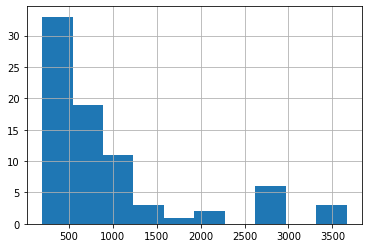

In [17]:
merged[merged['grp']=='A']['rev'].hist()

<AxesSubplot:>

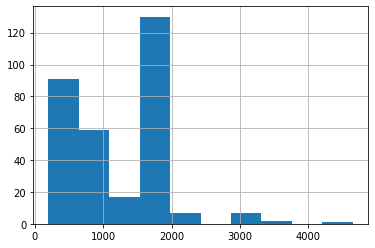

In [18]:
merged[merged['grp']=='B']['rev'].hist()

In [19]:
def shapiro_test(data):
    print(shapiro(data))
    if shapiro(data)[1] > 0.05:
        print('Данные распределены нормально')
    else:
        print('Данные распределены ненормально')

In [20]:
shapiro_test(merged[merged['grp']=='A']['rev'])

ShapiroResult(statistic=0.7353236079216003, pvalue=1.4986822893803264e-10)
Данные распределены ненормально


In [21]:
shapiro_test(merged[merged['grp']=='B']['rev'])

ShapiroResult(statistic=0.8547235727310181, pvalue=1.5437024585965894e-16)
Данные распределены ненормально


In [22]:
merged["log_rev"] = np.log(merged.rev)

In [23]:
a_group = merged.query("grp == 'A'")
b_group = merged.query("grp == 'B'")

<AxesSubplot:>

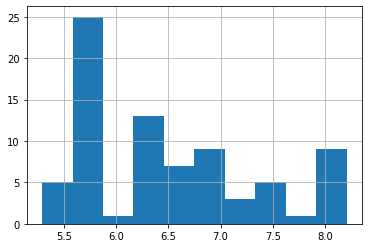

In [24]:
a_group.log_rev.hist()

<AxesSubplot:>

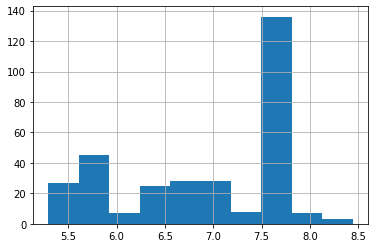

In [25]:
b_group.log_rev.hist()

In [26]:
shapiro_test(a_group.log_rev)

ShapiroResult(statistic=0.9057686924934387, pvalue=2.680935176613275e-05)
Данные распределены ненормально


In [27]:
shapiro_test(b_group.log_rev)

ShapiroResult(statistic=0.8419413566589355, pvalue=2.9242029102554055e-17)
Данные распределены ненормально


Проверим гипотезу, что распрделение в 1 выборке соответстсвует распределению во 2 выборке с помощью теста Манна-Уитни

In [29]:
print(mannwhitneyu(a_group.rev, b_group.rev))
if mannwhitneyu(a_group.rev, b_group.rev)[1] > 0.05:
    print('Принимаем H0, между данными нет статистически значимых различий')
else:
    print('На основании значения p-value мы не можем отвергнуть нулевую гипотезу. Данные статистически различаются')

MannwhitneyuResult(statistic=9001.0, pvalue=0.0002511393831406922)
На основании значения p-value мы не можем отвергнуть нулевую гипотезу. Данные статистически различаются


Разница между распределениями все же есть